In [1]:
%matplotlib widget
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import astropy.units as u
import astropy.constants as const

import lightkurve as lk

import sys
sys.path.append('/Users/james/Dropbox/research_projects/FFD/')
from FFD import FFD

from scipy.optimize import curve_fit

from astropy.timeseries import LombScargle

/Users/james/anaconda3/lib/python3.11/site-packages/lightkurve/config/__init__.py:119: UserWarning: The default Lightkurve cache directory, used by download(), etc., has been moved to /Users/james/.lightkurve/cache. Please move all the files in the legacy directory /Users/james/.lightkurve-cache to the new location and remove the legacy directory. Refer to https://docs.lightkurve.org/reference/config.html#default-cache-directory-migration for more information.
  warnings.warn(


In [2]:
import matplotlib
matplotlib.rcParams.update({'font.size':18})
matplotlib.rcParams.update({'font.family':'serif'})

<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

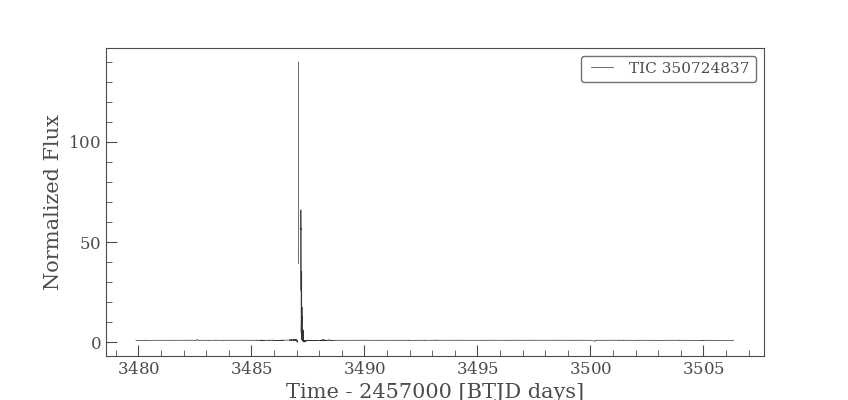

In [3]:
TESS = lk.search_lightcurve('278.5357759 9.5670520', mission='TESS').download_all()
TESS[0].plot()

In [4]:
TESS[0]['flux'].value

array([1.0017478 , 0.96876544, 0.980783  , ..., 0.9775089 , 0.9875273 ,
       0.99391925], dtype='>f4')

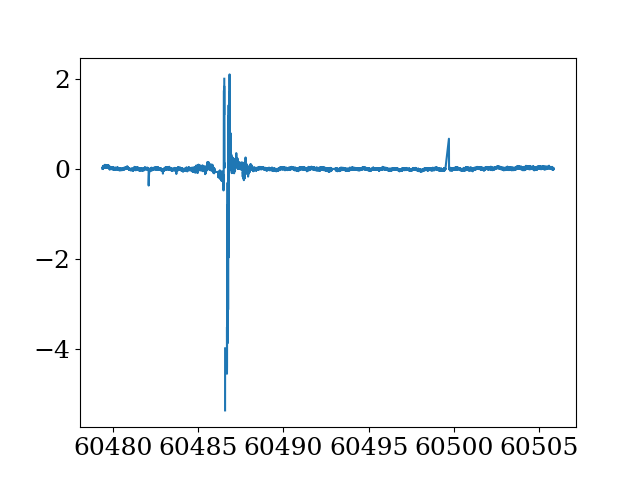

In [5]:
plt.figure()
plt.plot(TESS[0]['time'].value + 2457000 - 2400000.5, -2.5 * np.log10((TESS[0]['flux'].value/ np.nanmedian(TESS[0]['flux'].value))))

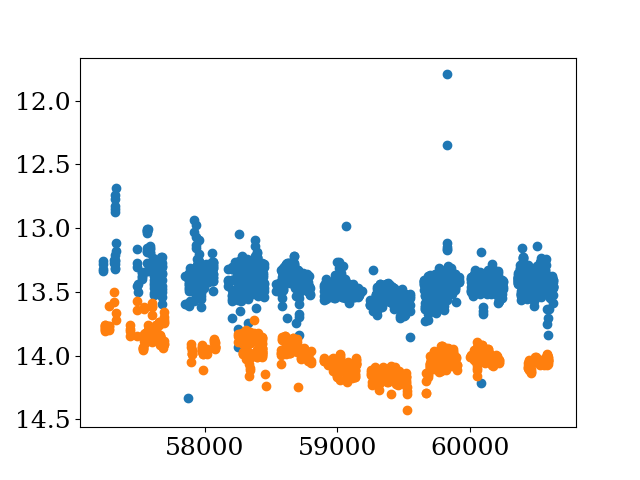

In [6]:
# ATLAS
atlas = pd.read_table('data/atlas_job1892282.txt', delim_whitespace=True)

ao = (atlas['F'] == 'o') & (atlas['dm'] < 0.05) & (atlas['m'] > 10)
ac = (atlas['F'] == 'c') & (atlas['dm'] < 0.05)  & (atlas['m'] > 10)

plt.figure()
plt.scatter(atlas['MJD'][ao], atlas['m'][ao]) 
plt.scatter(atlas['MJD'][ac], atlas['m'][ac])
plt.gca().invert_yaxis()

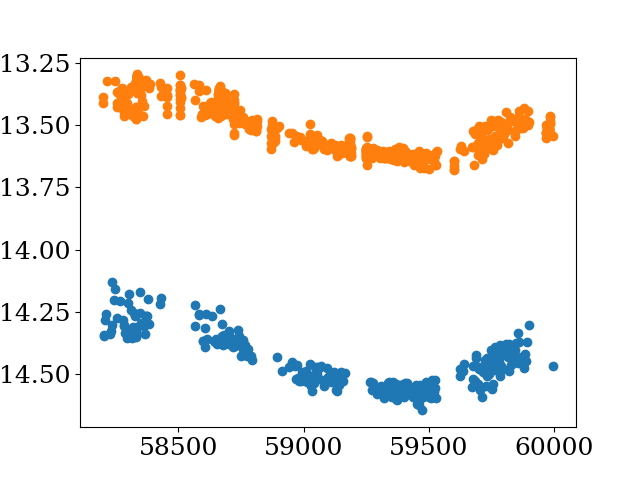

In [7]:
# ZTF
# from: https://ztf.snad.space/dr17/view/538202200014358
# need new ZTF data for more recent events (e.g. from Alert)
ztf = pd.read_csv('data/ZTF17_538202200014358.csv')

zr = ztf['filter'] == 'zr'
zg = ztf['filter'] == 'zg'

plt.figure()
plt.scatter(ztf['mjd'][zg], ztf['mag'][zg])
plt.scatter(ztf['mjd'][zr], ztf['mag'][zr])
plt.gca().invert_yaxis()

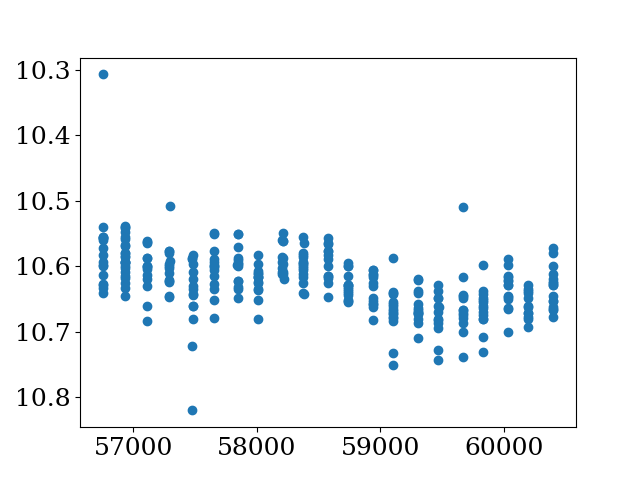

In [8]:
# WISE
wise = pd.read_csv('data/278.5357759 9.567052neowiser_p1bs_psd.csv')
plt.figure()
plt.scatter(wise['mjd'], wise['w1mpro'])
plt.gca().invert_yaxis()

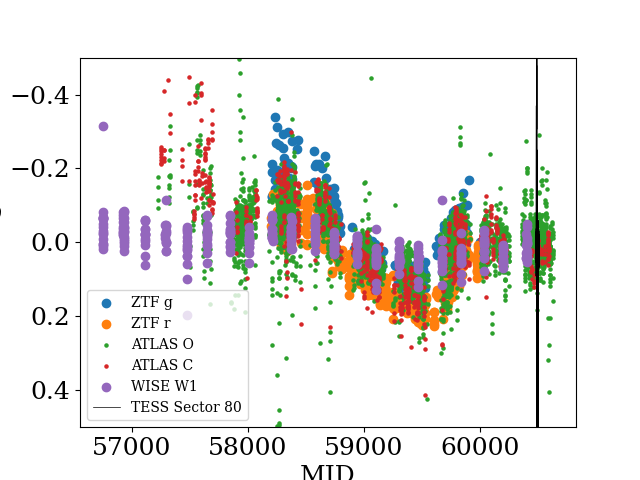

In [154]:
# combined...
plt.figure()

plt.scatter(ztf['mjd'][zg], ztf['mag'][zg] - np.nanmedian(ztf['mag'][zg]), label='ZTF g')
plt.scatter(ztf['mjd'][zr], ztf['mag'][zr] - np.nanmedian(ztf['mag'][zr]), label='ZTF r')

plt.scatter(atlas['MJD'][ao], atlas['m'][ao] - np.nanmedian(atlas['m'][ao]),s=5, label='ATLAS O') 
plt.scatter(atlas['MJD'][ac], atlas['m'][ac] - np.nanmedian(atlas['m'][ac]),s=5, label='ATLAS C')

plt.scatter(wise['mjd'], wise['w1mpro'] - np.nanmedian(wise['w1mpro']), label='WISE W1')

#add TESS!
plt.plot(TESS[0]['time'].value + 2457000 - 2400000.5, -2.5 * np.log10((TESS[0]['flux'].value/ np.nanmedian(TESS[0]['flux'].value))), 
         c='k', lw=0.5, label='TESS Sector 80')

plt.ylim(0.5,-0.5)
            
plt.legend(fontsize=10)
plt.ylabel('$\Delta$ Mag')
plt.xlabel('MJD')
plt.savefig('combined_LC.png', dpi=150, bbox_inches='tight', pad_inches=0.25)

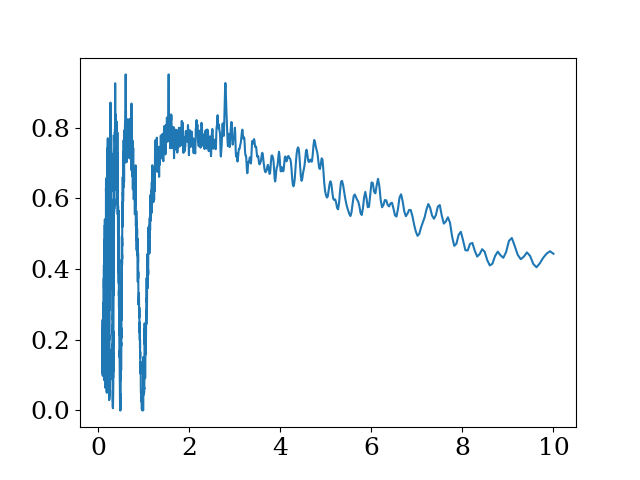

In [22]:
ze = ztf['mjd'][zr].values < 58500
frequency, power = LombScargle(ztf['mjd'][zr].values[ze], ztf['mag'][zr].values[ze]).autopower(minimum_frequency=0.1, maximum_frequency=10)

plt.figure()
plt.plot(1./frequency, power)
# plt.xscale("log")

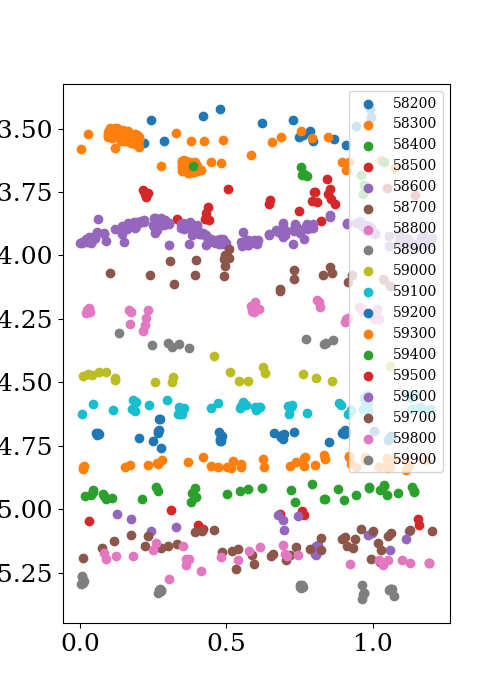

In [104]:
plt.figure(figsize=(5,7))

for k in range(30):
    # print(str(58100+(k*100)))
    ze = (ztf['mjd'][zr].values >= (58100+(k*100))) & (ztf['mjd'][zr].values < (58200+(k*100)))
    if sum(ze)>5:
        plt.scatter((ztf['mjd'][zr].values[ze] % 1.21), ztf['mag'][zr].values[ze]+(k*0.1), label=str(58100+(k*100)))
        # print(str(58100+(k*100)))
plt.gca().invert_yaxis()
# plt.legend(fontsize=10)

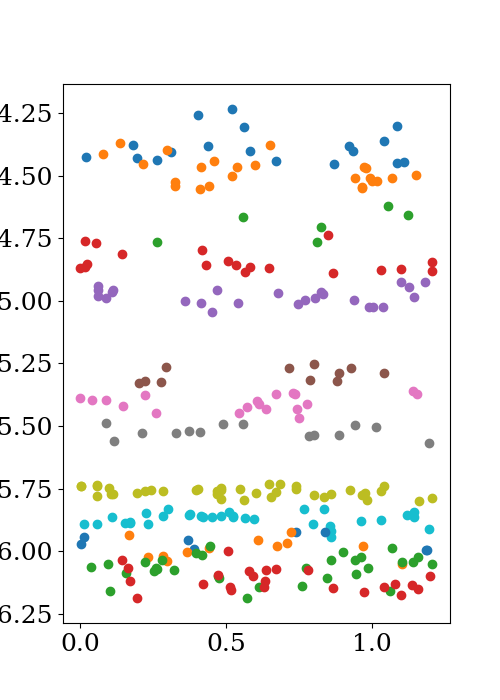

In [132]:
plt.figure(figsize=(5,7))

for k in range(30):
    # print(str(58100+(k*100)))
    ze = (ztf['mjd'][zg].values >= (58100+(k*100))) & (ztf['mjd'][zg].values < (58200+(k*100)))
    if sum(ze)>5:
        plt.scatter((ztf['mjd'][zg].values[ze] % 1.21), ztf['mag'][zg].values[ze]+(k*0.1), label=str(58100+(k*100)))
        # print(str(58100+(k*100)))
plt.gca().invert_yaxis()
# plt.legend(fontsize=10)

Text(0, 0.5, 'ZTF r (Mag)')

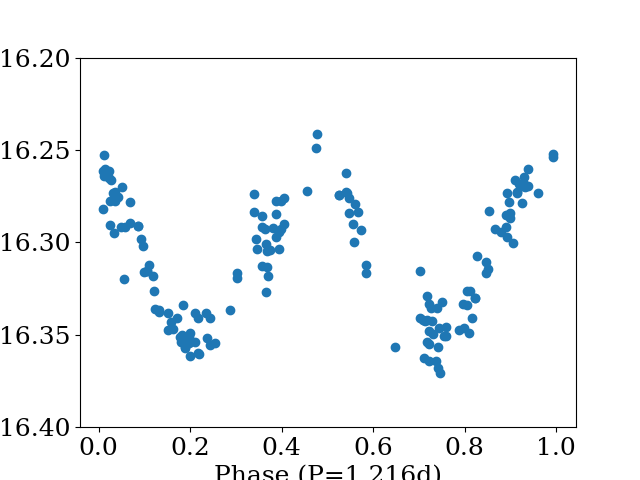

In [129]:
plt.figure()
ze = (ztf['mjd'][zr].values >= (58650)) & (ztf['mjd'][zr].values < (58700))
plt.scatter((ztf['mjd'][zr].values[ze] % 1.216) / 1.216, ztf['mag'][zr].values[ze]+(k*0.1), label=str(58100+(k*100)))

plt.gca().invert_yaxis()
plt.xlabel('Phase (P=1.216d)')
plt.ylim(16.4, 16.2)
plt.ylabel('ZTF r (Mag)')

# plt.legend(fontsize=10)

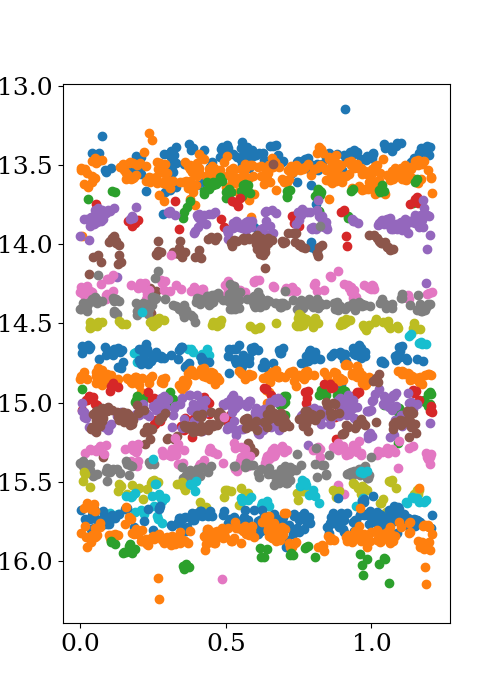

In [103]:
plt.figure(figsize=(5,7))

for k in range(30):
    # print(str(58100+(k*100)))
    ze = (atlas['MJD'][ao].values >= (58100+(k*100))) & (atlas['MJD'][ao].values < (58200+(k*100)))
    if sum(ze)>5:
        plt.scatter((atlas['MJD'][ao].values[ze] % 1.21), atlas['m'][ao].values[ze]+(k*0.1), label=str(58100+(k*100)))
        # print(str(58100+(k*100)))
plt.gca().invert_yaxis()
# plt.legend(fontsize=10)


# plt.scatter(atlas['MJD'][ao], atlas['m'][ao]) 


In [101]:
atlas['MJD'][ao].values

array([57230.361226, 57230.374178, 57230.41469 , ..., 60630.19186 ,
       60630.195083, 60630.200624])

(0.85, 1.12)

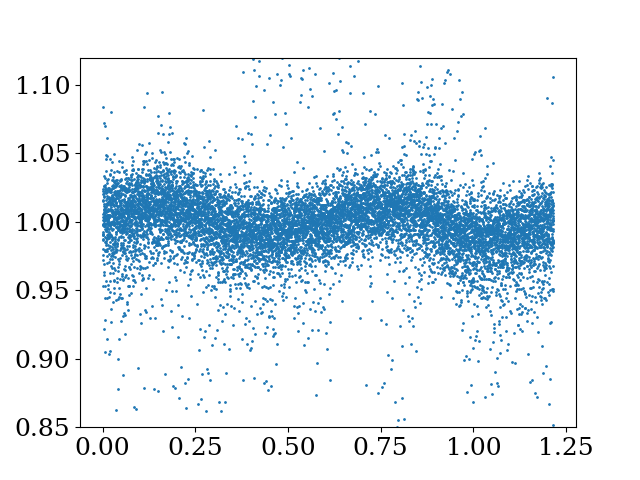

In [131]:
plt.figure()
# plt.scatter((ztf['mjd'][zr].values[ze] % 2.798)/2.798, ztf['mag'][zr].values[ze])
plt.scatter((TESS[0]['time'].value % 1.216), TESS[0]['flux'].value/ np.nanmedian(TESS[0]['flux'].value),s=1)
plt.ylim(.85, 1.12)

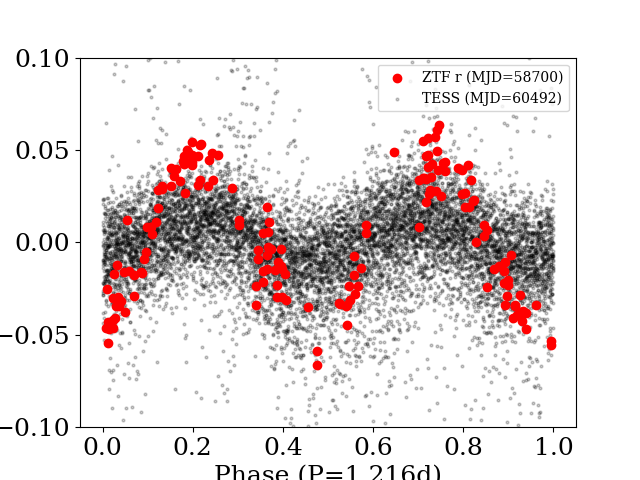

In [158]:
plt.figure()
ze = (ztf['mjd'][zr].values >= (58650)) & (ztf['mjd'][zr].values < (58700))
plt.scatter((ztf['mjd'][zr].values[ze] % 1.216) / 1.216, 
            ztf['mag'][zr].values[ze] - np.nanmedian(ztf['mag'][zr].values[ze]), label='ZTF r (MJD=58700)', c='r')

plt.scatter(((TESS[0]['time'].value + 2457000 - 2400000.5)% 1.216) / 1.216,
            2.5 * np.log10((TESS[0]['flux'].value/ np.nanmedian(TESS[0]['flux'].value))), 
            s=4, c='k', alpha=0.2,label='TESS (MJD=60492)', zorder=0)

plt.gca().invert_yaxis()
plt.xlabel('Phase (P=1.216d)')
plt.ylim(-.1,0.1)
plt.ylabel(r'$\Delta$ Mag')
plt.legend(fontsize=10)
plt.savefig('ZTF24aaerzwh_per.png', dpi=150, bbox_inches='tight', pad_inches=0.25, facecolor='w')


In [142]:
TESS[0].sector

80

In [151]:
np.nanmedian(TESS[0]['time'].value + 2457000 - 2400000.5)

60492.514494923875

In [155]:
0.607446*2

1.214892